In [15]:
import pathlib
import functools

import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

We begin by reading the data and summarizing the variables.

In [16]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0301.csv'
df = pd.read_csv(path)
summary = df.groupby('Treatment').describe()                                    
summary

Rainfall                                                             
             count        mean         std  min     25%    50%      75%     max
Treatment                                                                      
Seeded        26.0  441.984615  650.787171  4.1  98.125  221.6  406.025  2745.6
Unseeded      26.0  164.588462  278.426404  1.0  24.825   44.2  159.200  1202.6

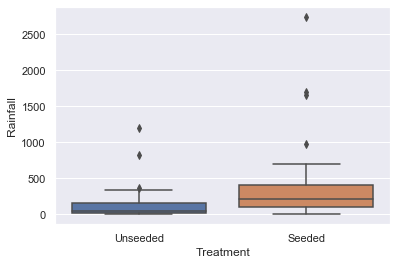

In [17]:
sns.boxplot(x='Treatment', y='Rainfall', data=df)   

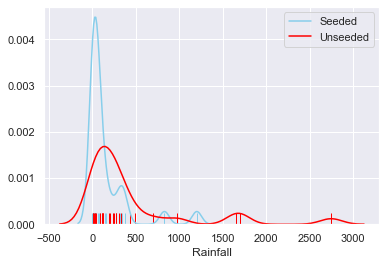

In [18]:
sns.distplot(df.loc[df.Treatment == 'Unseeded', 'Rainfall'], rug=True, hist=False, label='Seeded', color='skyblue')
sns.distplot(df.loc[df.Treatment == 'Seeded', 'Rainfall'], rug=True, hist=False, label='Unseeded', color='red')
plt.legend()

The skewness suggests a need to apply a logarithmic transformation.

           count      mean       std       min       25%       50%       75%       max
Treatment                                                                             
Seeded      26.0  5.134187  1.599514  1.410987  4.581480  5.396406  6.000699  7.917755
Unseeded    26.0  3.990406  1.641847  0.000000  3.211421  3.786259  5.069278  7.092241


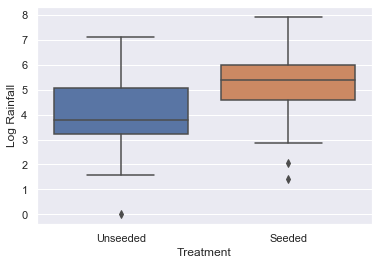

In [21]:
df['Log Rainfall'] = np.log(df['Rainfall'])                                     
summary = df.groupby('Treatment')['Log Rainfall'].describe()                    
print(summary)                                                                  
sns.boxplot(x='Treatment', y='Log Rainfall', data=df)  

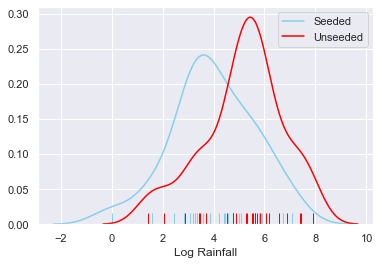

In [22]:
sns.distplot(df.loc[df.Treatment == 'Unseeded', 'Log Rainfall'], rug=True, hist=False, label='Seeded', color='skyblue')
sns.distplot(df.loc[df.Treatment == 'Seeded', 'Log Rainfall'], rug=True, hist=False, label='Unseeded', color='red')
plt.legend()

In [23]:
a = df.loc[df.Treatment == 'Seeded', 'Log Rainfall']                            
b = df.loc[df.Treatment == 'Unseeded', 'Log Rainfall']                          
t, p = scipy.stats.ttest_ind(a, b, equal_var=False) 
print(t, p)

2.5443693488547234 0.014084898742672516


A two-sided p-value of 8.7e-6 is strong evidence towards rejecting the null hypothesis.  There is sufficient evidence that the means are different.

In [24]:
n1 = summary.loc['Seeded', 'count']                                             
n2 = summary.loc['Unseeded', 'count']                                           
s1 = summary.loc['Seeded', 'std']                                               
s2 = summary.loc['Unseeded', 'std']                                             
est = summary.loc['Seeded', 'mean'] - summary.loc['Unseeded', 'mean']           
sp = np.sqrt(((n1 - 1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2))         
se = sp * np.sqrt(1 / n1 + 1 / n2)                                                                                   
                                                                                
ci = scipy.stats.t.interval(0.95, loc=est, scale=se, df=50)                     
print(ci)                                                                       
ci_orig = np.exp(ci)                                                            
print(ci_orig) 

(0.24086505030952876, 2.0466972486197323)
[1.27234932 7.74228798]


The a two sided p-value of only 8.7e-6, there is not sufficient evidence to reject the null hypothesis.